In [62]:
import pandas as pd
import seaborn as sb
import numpy as np
import datetime
import requests

df = pd.read_json('gme.json')
df = df.drop('Adj Close', axis=1)

In [63]:
def grab_data(): 
    data = {
        "Date": [],
        "Open": [],
        "High": [],
        "Low": [],
        "Close": [],
        "Volume": []
    }
    
    api_key = '44YWaVMaua5SybbN7NME5I08xgYyvbjy'
    base_url = 'https://api.polygon.io/v2/aggs/ticker'
    ticker = 'GME'
    multiplier = 1
    timespan = 'day'
    from_date = '2024-05-14'
    to_date = '2024-09-26'

    url = f'{base_url}/{ticker}/range/{multiplier}/{timespan}/{from_date}/{to_date}?apiKey={api_key}'

    response = requests.get(url)
    response_data = response.json()
    
    for result in response_data['results']:
        date = pd.to_datetime(result['t'], unit='ms')
        data['Date'].append(date)
        data['Open'].append(result['o'])
        data['High'].append(result['h'])
        data['Low'].append(result['l'])
        data['Close'].append(result['c'])
        data['Volume'].append(result['v'])
    return pd.DataFrame(data)

polygon_df = grab_data()
df = df.append(polygon_df, ignore_index=True)

C:\Users\zmorrato\AppData\Local\Temp\ipykernel_5496\2852885271.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(polygon_df, ignore_index=True)


Date - The day the stock was observed
Open - The price of the stock the market opens
High - The highest recorded price of the stock for the day
Low - The lowest reocrded price of the stock for the day 
Close
Adj Close
Volume


In [24]:
df[df['High'] == df['High'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [27]:




# Create monthly averages using a loop
monthlyAverages = {month: df[df['Date'].dt.month == i]['High'].mean() 
                   for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)}

# Find the month with the highest average
highestMonth, highestValue = max(monthlyAverages.items(), key=lambda x: x[1])

monthlyAverages, highestMonth, highestValue




({'Jan': 8.875342714606743,
  'Feb': 8.462217096997689,
  'Mar': 9.877808756972113,
  'Apr': 9.833972748427673,
  'May': 9.571927732067506,
  'Jun': 10.51488803837953,
  'Jul': 9.701705275862063,
  'Aug': 9.847940573770492,
  'Sep': 9.79994723333334,
  'Oct': 9.269519634297518,
  'Nov': 9.70278612222222,
  'Dec': 8.78482488362069},
 'Jun',
 10.51488803837953)

0.10259646883179026

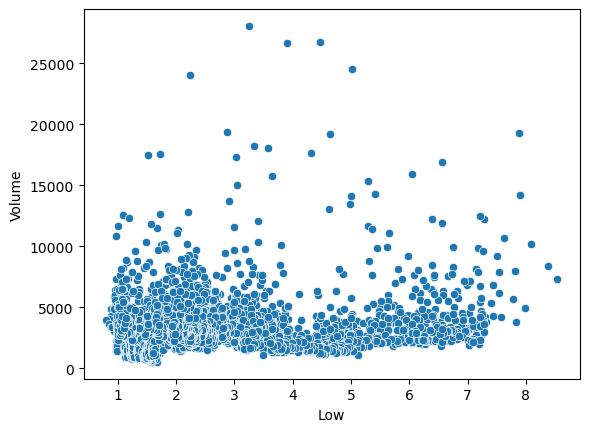

In [36]:
sb.scatterplot(data=df, x=np.sqrt(df['Low']), y=np.sqrt(df['Volume']))
df['Low'].corr(df['Volume'])

After examining the scatterplot for low vs volume, there appears to be no relationship between these variables. To confirm this, I calculated the pearson correlation coefficient and my hunch was right! The correlation coefficient is 0.1 which means that the direction of this relationship is positive and it's strength is very weak. In conclusion, there is no relationship between the low of the day and the volume of stock being traded.

<AxesSubplot:xlabel='Date', ylabel='High'>

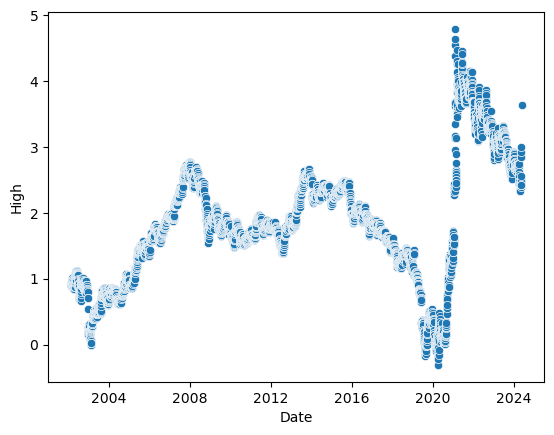

In [44]:
sb.scatterplot(data=df, x='Date', y=np.log(df['High']))

Simply, the date and high cannot have a relationship as date is a non-integer value and there appears to be no correlation between the date and high.

In [47]:
df.tail()

,Date,Open,High,Low,Close,Volume
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,24308600
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,24775100
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,25759300
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,36831900
5599,2024-05-13,26.340000,38.200001,24.770000,30.450001,182308700


In [16]:
total = 0
years = len(df['Date'].dt.year.unique())
for year in df['Date'].dt.year.unique():
    if year < 2024:
        total += len(df[df['Date'].dt.year == year])
    
print(total/years, "samples on average")

239.47826086956522 samples on average


In [52]:
curr_date = pd.Timestamp('2024-05-13')
curr_date = curr_date + pd.DataOffset(days=1)
curr_date
#for day in polygon_data['results']:
 #   new_row = {
  #      'Date': 
   # }

AttributeError: module 'pandas' has no attribute 'DataOffset'

{'v': 187230976.0, 'vw': 29.7784, 'o': 26.34, 'c': 30.45, 'h': 38.2, 'l': 24.77, 't': 1715572800000, 'n': 1717610}
{'v': 206973629.0, 'vw': 51.6626, 'o': 64.83, 'c': 48.75, 'h': 64.83, 'l': 36, 't': 1715659200000, 'n': 2971358}
{'v': 131776493.0, 'vw': 38.3398, 'o': 40.31, 'c': 39.55, 'h': 42.35, 'l': 31, 't': 1715745600000, 'n': 1738808}
{'v': 76159605.0, 'vw': 31.1035, 'o': 33.98, 'c': 27.67, 'h': 35.24, 'l': 27.59, 't': 1715832000000, 'n': 837428}
{'v': 96046070.0, 'vw': 21.566, 'o': 21.86, 'c': 22.21, 'h': 22.41, 'l': 19.7, 't': 1715918400000, 'n': 925643}
{'v': 55261216.0, 'vw': 21.1343, 'o': 21.54, 'c': 23.14, 'h': 23.4, 'l': 18.94, 't': 1716177600000, 'n': 504233}
{'v': 49248792.0, 'vw': 21.434, 'o': 22.24, 'c': 22.12, 'h': 22.85, 'l': 20.0401, 't': 1716264000000, 'n': 330980}
{'v': 43521390.0, 'vw': 21.4924, 'o': 21.56, 'c': 21.12, 'h': 22.25, 'l': 20.76, 't': 1716350400000, 'n': 286155}
{'v': 30561058.0, 'vw': 19.7059, 'o': 21.4, 'c': 18.32, 'h': 21.4, 'l': 18.26, 't': 1716436800000, 'n': 231176}
{'v': 43016696.0, 'vw': 19.3481, 'o': 18.42, 'c': 19, 'h': 19.68, 'l': 17.7, 't': 1716523200000, 'n': 289042}
{'v': 105077338.0, 'vw': 23.5677, 'o': 23.1, 'c': 23.78, 'h': 26.66, 'l': 21.15, 't': 1716868800000, 'n': 764360}
{'v': 26701594.0, 'vw': 21.865, 'o': 22, 'c': 21.24, 'h': 22.98, 'l': 21.0501, 't': 1716955200000, 'n': 209201}
{'v': 24508770.0, 'vw': 21.5984, 'o': 21.02, 'c': 22.61, 'h': 22.7, 'l': 20.1, 't': 1717041600000, 'n': 161759}
{'v': 22018706.0, 'vw': 22.7474, 'o': 22.58, 'c': 23.14, 'h': 23.72, 'l': 21.6802, 't': 1717128000000, 'n': 163425}
{'v': 165769655.0, 'vw': 32.7511, 'o': 40.19, 'c': 28, 'h': 40.5, 'l': 26.4, 't': 1717387200000, 'n': 1763403}
{'v': 51662126.0, 'vw': 26.8713, 'o': 26.26, 'c': 26.5, 'h': 28.01, 'l': 25.2, 't': 1717473600000, 'n': 503879}
{'v': 73016966.0, 'vw': 29.667, 'o': 26.3, 'c': 31.57, 'h': 31.84, 'l': 26.11, 't': 1717560000000, 'n': 616730}
{'v': 206683491.0, 'vw': 41.8822, 'o': 31.57, 'c': 46.55, 'h': 47.5, 'l': 31.28, 't': 1717646400000, 'n': 1901792}
{'v': 279025853.0, 'vw': 35.9393, 'o': 37.69, 'c': 28.22, 'h': 48, 'l': 26.12, 't': 1717732800000, 'n': 3119767}
{'v': 131572406.0, 'vw': 25.5979, 'o': 28.97, 'c': 24.83, 'h': 29.34, 'l': 23.06, 't': 1717992000000, 'n': 1246838}
{'v': 146912150.0, 'vw': 27.028, 'o': 24.4, 'c': 30.49, 'h': 30.92, 'l': 22.79, 't': 1718078400000, 'n': 1125557}
{'v': 147986688.0, 'vw': 29.5768, 'o': 29.17, 'c': 25.46, 'h': 33.7, 'l': 24.83, 't': 1718164800000, 'n': 1174781}
{'v': 107304615.0, 'vw': 27.5909, 'o': 26.56, 'c': 29.12, 'h': 29.58, 'l': 25.56, 't': 1718251200000, 'n': 770748}
{'v': 82862801.0, 'vw': 28.8757, 'o': 29.23, 'c': 28.7, 'h': 30.66, 'l': 27.41, 't': 1718337600000, 'n': 641385}
{'v': 90351902.0, 'vw': 26.2879, 'o': 28.55, 'c': 25.22, 'h': 29.18, 'l': 23.79, 't': 1718596800000, 'n': 663738}
{'v': 38069668.0, 'vw': 24.8316, 'o': 24.58, 'c': 24.7, 'h': 25.97, 'l': 23.61, 't': 1718683200000, 'n': 292038}
{'v': 36015367.0, 'vw': 24.9065, 'o': 24.25, 'c': 25.59, 'h': 25.93, 'l': 23.65, 't': 1718856000000, 'n': 280471}
{'v': 27921554.0, 'vw': 24.4925, 'o': 25.24, 'c': 23.93, 'h': 25.81, 'l': 23.51, 't': 1718942400000, 'n': 221564}
{'v': 22156011.0, 'vw': 23.9581, 'o': 23.26, 'c': 23.65, 'h': 24.83, 'l': 23.24, 't': 1719201600000, 'n': 185488}
{'v': 27625497.0, 'vw': 23.6128, 'o': 23.6, 'c': 24.93, 'h': 24.97, 'l': 22.55, 't': 1719288000000, 'n': 213379}
{'v': 17767477.0, 'vw': 24.6685, 'o': 24.6, 'c': 24.2, 'h': 25.38, 'l': 24.04, 't': 1719374400000, 'n': 144621}
{'v': 34865532.0, 'vw': 25.3699, 'o': 24.1, 'c': 25.09, 'h': 26.69, 'l': 24.06, 't': 1719460800000, 'n': 256471}
{'v': 20173108.0, 'vw': 25.2129, 'o': 25.02, 'c': 24.69, 'h': 26.17, 'l': 24.31, 't': 1719547200000, 'n': 163080}
{'v': 30688700.0, 'vw': 23.1225, 'o': 23.35, 'c': 23.33, 'h': 23.78, 'l': 22.31, 't': 1719806400000, 'n': 256817}
{'v': 13702948.0, 'vw': 23.7733, 'o': 23.24, 'c': 23.98, 'h': 24.3199, 'l': 23.1, 't': 1719892800000, 'n': 122967}
{'v': 11824488.0, 'vw': 24.3177, 'o': 24.03, 'c': 24.37, 'h': 24.89, 'l': 23.65, 't': 1719979200000, 'n': 98235}
{'v': 11780106.0, 'vw': 24.4056, 'o': 24.18, 'c': 24.18, 'h': 25.0799, 'l': 23.82, 't': 1720152000000, 'n': 105541}
{'v': 11787767.0, 'vw': 24.5811, 'o': 24.12, 'c': 24.45, 'h': 25.14, 'l': 23.85, 't': 1720411200000, 'n': 101730}
{'v': 9519483.0, 'vw': 24.4873, 'o': 24.6, 'c': 24.6, 'h': 25.1799, 'l': 24, 't': 1720497600000, 'n': 86197}
{'v': 22324714.0, 'vw': 25.6237, 'o': 25, 'c': 24.97, 'h': 26.45, 'l': 24.9, 't': 1720584000000, 'n': 169027}
{'v': 13031074.0, 'vw': 25.5166, 'o': 25.435, 'c': 25.57, 'h': 26.02, 'l': 25.02, 't': 1720670400000, 'n': 101291}
{'v': 16206041.0, 'vw': 26.0694, 'o': 25.76, 'c': 26.05, 'h': 26.89, 'l': 25.42, 't': 1720756800000, 'n': 117458}
{'v': 17099177.0, 'vw': 26.5503, 'o': 25.98, 'c': 27, 'h': 27.2, 'l': 25.651, 't': 1721016000000, 'n': 146126}
{'v': 25589339.0, 'vw': 28.2559, 'o': 27.75, 'c': 28.54, 'h': 28.83, 'l': 27.3701, 't': 1721102400000, 'n': 230693}
{'v': 23768607.0, 'vw': 28.6916, 'o': 28.4, 'c': 27.98, 'h': 29.79, 'l': 27.24, 't': 1721188800000, 'n': 209995}
{'v': 16967464.0, 'vw': 26.8487, 'o': 27.98, 'c': 25.88, 'h': 28.382, 'l': 25.61, 't': 1721275200000, 'n': 153246}
{'v': 12757769.0, 'vw': 25.4407, 'o': 25.55, 'c': 24.97, 'h': 26.39, 'l': 24.85, 't': 1721361600000, 'n': 112431}
{'v': 14034561.0, 'vw': 25.1515, 'o': 24.84, 'c': 25.22, 'h': 25.98, 'l': 24.38, 't': 1721620800000, 'n': 113427}
{'v': 7920223.0, 'vw': 25.3721, 'o': 25.22, 'c': 25.5, 'h': 25.68, 'l': 24.89, 't': 1721707200000, 'n': 69115}
{'v': 9521342.0, 'vw': 24.4377, 'o': 25.15, 'c': 24.01, 'h': 25.45, 'l': 23.93, 't': 1721793600000, 'n': 88946}
{'v': 8554139.0, 'vw': 24.0677, 'o': 23.59, 'c': 23.95, 'h': 24.5899, 'l': 23.36, 't': 1721880000000, 'n': 76494}
{'v': 6828083.0, 'vw': 24.4636, 'o': 24.28, 'c': 24.13, 'h': 24.77, 'l': 24.11, 't': 1721966400000, 'n': 60249}
{'v': 7244976.0, 'vw': 23.8618, 'o': 24.23, 'c': 23.6, 'h': 24.38, 'l': 23.54, 't': 1722225600000, 'n': 70311}
{'v': 9269914.0, 'vw': 22.9368, 'o': 23.6, 'c': 22.4, 'h': 23.89, 'l': 22.34, 't': 1722312000000, 'n': 86746}
{'v': 7979507.0, 'vw': 22.9276, 'o': 22.86, 'c': 22.67, 'h': 23.45, 'l': 22.61, 't': 1722398400000, 'n': 72162}
{'v': 9331170.0, 'vw': 21.9993, 'o': 22.92, 'c': 21.71, 'h': 23.09, 'l': 21.56, 't': 1722484800000, 'n': 95594}
{'v': 9023427.0, 'vw': 20.9188, 'o': 20.95, 'c': 21.07, 'h': 21.61, 'l': 20.43, 't': 1722571200000, 'n': 86579}
{'v': 12205928.0, 'vw': 19.6804, 'o': 18.83, 'c': 20.65, 'h': 20.8, 'l': 18.73, 't': 1722830400000, 'n': 121093}
{'v': 6505327.0, 'vw': 20.9964, 'o': 21.02, 'c': 21.28, 'h': 21.58, 'l': 20.26, 't': 1722916800000, 'n': 62798}
{'v': 6093211.0, 'vw': 20.9596, 'o': 21.15, 'c': 20.83, 'h': 21.46, 'l': 20.38, 't': 1723003200000, 'n': 57651}
{'v': 5433545.0, 'vw': 21.4996, 'o': 21.01, 'c': 21.75, 'h': 21.88, 'l': 20.81, 't': 1723089600000, 'n': 49388}
{'v': 4785694.0, 'vw': 21.8817, 'o': 21.51, 'c': 21.93, 'h': 22.17, 'l': 21.46, 't': 1723176000000, 'n': 47891}
{'v': 4448411.0, 'vw': 21.8159, 'o': 21.98, 'c': 21.88, 'h': 22.27, 'l': 21.45, 't': 1723435200000, 'n': 45083}
{'v': 3901045.0, 'vw': 22.1509, 'o': 21.96, 'c': 22.27, 'h': 22.3799, 'l': 21.86, 't': 1723521600000, 'n': 43222}
{'v': 3489174.0, 'vw': 22.1401, 'o': 22.34, 'c': 21.99, 'h': 22.73, 'l': 21.79, 't': 1723608000000, 'n': 40807}
{'v': 5359478.0, 'vw': 22.4864, 'o': 22.25, 'c': 22.53, 'h': 22.84, 'l': 21.97, 't': 1723694400000, 'n': 51276}
{'v': 3640573.0, 'vw': 22.4742, 'o': 22.37, 'c': 22.4, 'h': 22.69, 'l': 22.2376, 't': 1723780800000, 'n': 40419}
{'v': 4523304.0, 'vw': 22.7325, 'o': 22.35, 'c': 22.66, 'h': 23.1, 'l': 22.324, 't': 1724040000000, 'n': 44291}
{'v': 3570085.0, 'vw': 22.2771, 'o': 22.5, 'c': 22.28, 'h': 22.52, 'l': 21.96, 't': 1724126400000, 'n': 38649}
{'v': 3160203.0, 'vw': 22.4094, 'o': 22.17, 'c': 22.55, 'h': 22.65, 'l': 22.16, 't': 1724212800000, 'n': 32732}
{'v': 3379937.0, 'vw': 22.4521, 'o': 22.5, 'c': 22.12, 'h': 22.76, 'l': 22.09, 't': 1724299200000, 'n': 35912}
{'v': 4054285.0, 'vw': 22.3852, 'o': 22.25, 'c': 22.21, 'h': 22.62, 'l': 22.18, 't': 1724385600000, 'n': 38434}
{'v': 4772584.0, 'vw': 21.7604, 'o': 22.25, 'c': 21.36, 'h': 22.39, 'l': 21.3, 't': 1724644800000, 'n': 49869}
{'v': 4118383.0, 'vw': 20.9029, 'o': 21.06, 'c': 20.74, 'h': 21.29, 'l': 20.66, 't': 1724731200000, 'n': 43100}
{'v': 5216782.0, 'vw': 20.3559, 'o': 20.71, 'c': 19.9, 'h': 21.07, 'l': 19.88, 't': 1724817600000, 'n': 52563}
{'v': 10425400.0, 'vw': 21.6427, 'o': 20.5, 'c': 21.51, 'h': 22.45, 'l': 20.47, 't': 1724904000000, 'n': 83114}
{'v': 15568753.0, 'vw': 22.8807, 'o': 21.82, 'c': 23.42, 'h': 23.48, 'l': 21.73, 't': 1724990400000, 'n': 104582}
{'v': 11350531.0, 'vw': 23.6505, 'o': 24.15, 'c': 23.14, 'h': 24.69, 'l': 22.82, 't': 1725336000000, 'n': 100732}
{'v': 6696465.0, 'vw': 22.8619, 'o': 22.85, 'c': 22.12, 'h': 23.71, 'l': 22.11, 't': 1725422400000, 'n': 59812}
{'v': 5099768.0, 'vw': 22.1934, 'o': 22, 'c': 22.39, 'h': 22.68, 'l': 21.6568, 't': 1725508800000, 'n': 51566}
{'v': 23875493.0, 'vw': 23.3971, 'o': 22.4, 'c': 23.92, 'h': 24.48, 'l': 21.8, 't': 1725595200000, 'n': 162964}
{'v': 14060537.0, 'vw': 24.2228, 'o': 23.24, 'c': 24.25, 'h': 25.015, 'l': 23.16, 't': 1725854400000, 'n': 121466}
{'v': 19174509.0, 'vw': 23.4264, 'o': 24.77, 'c': 23.45, 'h': 24.8, 'l': 23.132, 't': 1725940800000, 'n': 151474}
{'v': 28921512.0, 'vw': 20.0772, 'o': 20.82, 'c': 20.64, 'h': 21.09, 'l': 19.31, 't': 1726027200000, 'n': 232332}
{'v': 9567543.0, 'vw': 20.3222, 'o': 20.47, 'c': 20.4, 'h': 20.71, 'l': 19.991, 't': 1726113600000, 'n': 80248}
{'v': 8052144.0, 'vw': 20.6308, 'o': 20.49, 'c': 20.65, 'h': 20.915, 'l': 20.34, 't': 1726200000000, 'n': 65180}
{'v': 5967521.0, 'vw': 20.2642, 'o': 20.45, 'c': 20.09, 'h': 20.52, 'l': 19.9159, 't': 1726459200000, 'n': 59428}
{'v': 6299096.0, 'vw': 20.1892, 'o': 20.24, 'c': 20.16, 'h': 20.56, 'l': 19.92, 't': 1726545600000, 'n': 57240}
{'v': 10728196.0, 'vw': 19.7796, 'o': 20.05, 'c': 19.65, 'h': 20.26, 'l': 19.42, 't': 1726632000000, 'n': 89499}
{'v': 8900588.0, 'vw': 19.6588, 'o': 19.89, 'c': 19.51, 'h': 20.0296, 'l': 19.47, 't': 1726718400000, 'n': 78403}
{'v': 60804837.0, 'vw': 21.3183, 'o': 19.63, 'c': 21.85, 'h': 22.03, 'l': 19.482, 't': 1726804800000, 'n': 204605}
{'v': 13945783.0, 'vw': 22.123, 'o': 21.54, 'c': 22.31, 'h': 22.56, 'l': 21.2301, 't': 1727064000000, 'n': 97755}
{'v': 12112487.0, 'vw': 22.2476, 'o': 22.61, 'c': 22.63, 'h': 22.72, 'l': 21.54, 't': 1727150400000, 'n': 80031}
{'v': 6137420.0, 'vw': 22.342, 'o': 22.16, 'c': 22.18, 'h': 22.83, 'l': 22.065, 't': 1727236800000, 'n': 51059}
{'v': 5771976.0, 'vw': 22.2713, 'o': 22.4, 'c': 22.29, 'h': 22.64, 'l': 21.87, 't': 1727323200000, 'n': 44048}